## Исследование данных о российском кинопрокате



- Предобработать данные    
- Изучить рынок российского кинопроката и выявить текущие тренды
- Изучить динамику выходов фильмов по годам
- Исследовать фильмы,которые финансировались с помощью государства 
   


### Шаг 1. Подготовка данных к анализу

In [63]:
# импорт используемых в работе библиотек
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format # вывод данных в ячейках не в экспоненциальном формате

Прочитаем файл mkrf_movies.csv и mkrf_shows.csv, сохраним их в переменные data и data_shows

In [64]:
data=pd.read_csv('/Users/nikitapusilin/Desktop/Проекты/Исследование данных о Российском кинопрокате/Исходные данные/mkrf_movies.csv')
#прочитаем файл mkrf_movies.csv в котором хранятся данные о прокате в российских кинотеатрах
data_shows=pd.read_csv('/Users/nikitapusilin/Desktop/Проекты/Исследование данных о Российском кинопрокате/Исходные данные/mkrf_shows.csv')
#прочитаем файл mkrf_movies.csv в котором хранятся данные о прокатных удостоверениях


Объеденим 2 таблицы `data` и `data_shows` в одну, для этого изменим тип данных у стобца `puNumber`. Выведем первые 5 строк таблицы.

In [65]:
data_shows['puNumber'] = data_shows['puNumber'].astype('str')#изменили тип данных у столбца puNumber
data['puNumber'] = data['puNumber'].astype('str')#изменили тип данных у столбца puNumber
data = data.merge(data_shows, on='puNumber', how='outer')#склеим таблицы по столбцу puNumber
display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Общая информация о данных таблицы `data`

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Рассмотрим полученную информацию подробнее.

Всего в таблице 16 столбцов, типы данных у каждого столбца - object и float.

Подробно разберём, какие в data столбцы и какую информацию они содержат:

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма;
- `box_office` — сборы в рублях.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущеенные значения.

Объедили данные таким образом, что все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм 

#### Вывод

Каждая строка таблицы содержит информацию о фильме, дате его выхода, страну производства, типе фильма, студию производства, режиссера, продюсера, возрастную категорию, информациб о объеме государственной поддержки, бюджет, рейтинг, жанр и сборы в рублях. Проблему которую нам необзодимо решить, это пропуски

### Шаг 2. Предобработка данных

#### Шаг 2.1. Изучим типы данных

Проверим типы данных и преобразуем их там, где это необходимо

In [13]:
data['ratings'] = pd.to_numeric(data['ratings'],errors='coerce')#поменяем тип данных данных в столбце ratings, для возможности проводить вычисления
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M')


Изменили тип данных в столбце `ratings` и поменяли формат в столбце `show_start_date` для удобства дальнейшей работы

#### Шаг 2.2. Изучим пропуски в датафрейме

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [68]:
display(data.isna().sum())

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                    4
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   967
genres                    976
box_office               4328
dtype: int64

Пустые значения свидетельствуют, что для некоторых фильмов доступна не вся информация. 
Заменяем пропущенные значения в столбцах с `financing_source` и `producer`. После этой операции нужно убедиться, что в этих столюцах не содержит пропусков.

In [69]:
data['financing_source'] = data['financing_source'].fillna('Без источника финансирования')# замена пропусков в столбце financing_source
data['producer'] = data['producer'].fillna(data['director'])# замена пропусков в столбце producer
data.isna().sum()# проверка: вычисление суммарного количества пропусков, выявленных в таблице data

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                    4
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   967
genres                    976
box_office               4328
dtype: int64

Пропуски были обнаружили в следующих столбцах `budget`, `refundable_support`, `nonrefundable_support`, `financing_source`, `producer`,`film_studio`, `production_country`, `ratings`, `genres` и `box_office`.

Пропуски в столбцах `film_studio`, `production_country`, `ratings`, `genres` и `box_office` полностью случайные и заполнить 
их какими-то значениями мы не можем.

Можно отметить, что пропуски в `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` — неслучайные: если стоит пропуск — значит фильм не имел государственной поддержки.

В `financing_source` заменяем пропуска на строку 'Без источника финансирования'.

В столбце `producer` заменим все пропуски на значения столбца director, предположим, что если продюсер не указан, режиссер сам себе продюсер.

#### Шаг 2.3. Проверка данных на дубликаты

Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.

In [26]:
display(data.duplicated().sum()) #проверим данные на полные дубликаты
display(data['puNumber'].duplicated().sum()) #проверим данные на дубликаты в столбце puNumber
display(data['title'].duplicated().sum()) #проверим данные на дубликаты в столбце title

data = data.drop_duplicates(subset=['title'])
data['title'] = data['title'].dropna() #удалим дубли в названиях фильмов
data = data.reset_index(drop=True) #восстановили индексы
data.isna().sum()

display(data['puNumber'].duplicated().sum()) #проверка на остсутствие дубликатов
display(data['title'].duplicated().sum()) #проверка на остсутствие дубликатов

0

0

0

0

0

0

В ходе предобработки были обнаружены дубликаты в названиях фильмов. Удалили дубликаты и выполнили проверкую

#### Шаг 2.4. Категориальные значения

В столбце `age_restriction` хранятся данные о возрастной категории фильмов в неудобном для чтения формате. Напишем функцию, которая вернет сокращенный формат

In [8]:
def category_age(row): #с помощью функции заменяем значение на более удобное для чтение
    if '16+' in row:
        return '16+'
    if '12+' in row:
        return '12+'
    if '18+' in row:
        return '18+'
    if '0+' in row:
        return '0+'
    if '6+' in row:
        return '6+'
data['age_restriction'] =  data['age_restriction'].apply(category_age)


data['type'] = data['type'].str.strip()#удалим пробелы в начале и конце строковых значений
data['genres'] = data['genres'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['producer'] = data['producer'].str.strip()
data['director'] = data['director'].str.strip()

В категориальных столбцах обноружили пробелы в начале и в конце строковых значений. Применили `str.strip()` для удаления пробелов.

In [73]:
display(data['genres'].value_counts().head(10))# рассмотрим уникальные значения в категориальных стобцах 
display(data['production_country'].value_counts().head(10))
display(data['film_studio'].value_counts().head(10))

драма                        476
комедия                      352
мелодрама,комедия            222
драма,мелодрама,комедия      189
драма,мелодрама              183
драма,комедия                158
триллер,драма,криминал       141
боевик,триллер,драма         140
фантастика,боевик,триллер     88
документальный                84
Name: genres, dtype: int64

США                     2172
Россия                  1821
СССР                     347
Франция                  301
Великобритания           257
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Name: production_country, dtype: int64

Киностудия "Мосфильм"                           341
ООО "Мульт в кино"                               57
Анимаккорд Лтд                                   23
ООО "Мульт в кино"                               18
ФГУП "ТПО "Киностудия "Союзмультфильм"           16
ООО "ТаББаК"                                     15
Опус Арте                                        14
Р А И Синема                                     14
ООО "Студия анимационного кино "Мельница"        14
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз     13
Name: film_studio, dtype: int64

* В столбце `production_country` мы обнаружили, что страна производства фильма может быть написана по разному, например 
    `Великобритания - США`,  `США - Великобритания`,  `США-Великобритания` и т.д.
* В столбце `film_studio`, мы обнаружили следующую ошибку `Эр А И Синема`   и   `Р А И Синема`
* В столбце `financing_source` мы обнаружили, что некотырые фильмы спонсировались `Министерством культуры` и `Фондом кино` одновременно
* В столбце `director` и `producer`, мы так же обнаружили значения написанные по разному  

Общая проблема — это данные, которые записаны через запятые, тире.

#### Шаг 2.5. Количественные значения
Исследуем количественные переменные и посмотрим, есть ли в данных подозрительные значения

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19T12:00:00.000Z,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.6,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28T12:00:00.000Z,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.8,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.2,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21T12:00:00.000Z,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.40
2684,Тряпичный союз,111010215,2015-06-08T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.3,"комедия,драма",1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.1,"комедия,мелодрама",72937783.20
2874,Помню - не помню!,111004916,2016-03-01T12:00:00.000Z,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.3,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.3,"комедия,мелодрама",70299052.00
3565,Притяжение (2016),111018116,2016-12-16T12:00:00.000Z,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.6,фантастика,1038321489.00


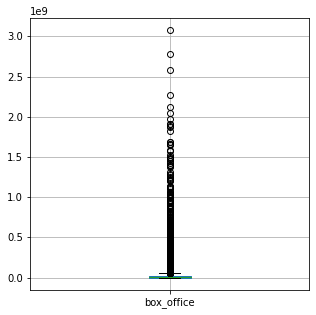

In [74]:
data.boxplot('box_office')#вызовем диаграмму с усами для box_office
display(data.query('(nonrefundable_support + refundable_support) > budget'))# найдем фильмы где бюджет меньше гос. поддержки 



Построим гистограммы для столбцов `budget`, `refundable_support`, `nonrefundable_support`,`ratings`,`box_office`

array([[<AxesSubplot:title={'center':'box_office'}>]], dtype=object)

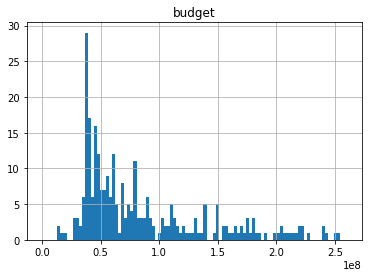

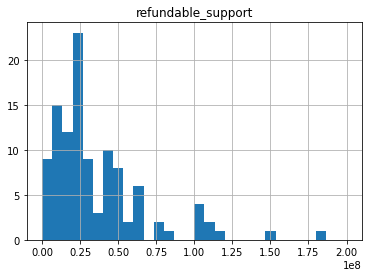

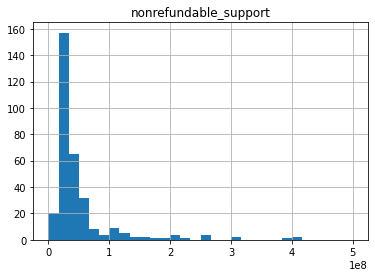

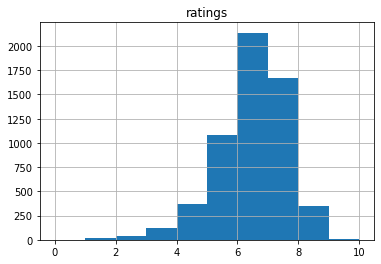

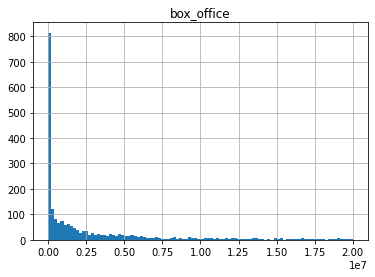

In [31]:
(
data.query('budget != 0') #изучим столбец бюджет, 
    .hist('budget',bins=100,range=(0,259999999))
)
(
data.query('refundable_support != 0') #изучим столбец refundable_support
    .hist('refundable_support',bins=30,range=(0,200000000))
)
(
data.query('nonrefundable_support != 0') #изучим столбец nonrefundable_support
    .hist('nonrefundable_support',bins=30,range=(0,500000000))
)
data.hist('ratings',bins=10,range=(0,10)) #изучим столбец ratings

(
data.query('box_office != 0') #изучим столбец box_office
    .hist('box_office',bins=100,range=(0,20000000))
)

В столбцах `budget`, `refundable_support`, `nonrefundable_support`, `ratings` данные распределены правдоподобно
Данные в столбце `box_office` смущают больше всего, мы могли бы отфильтровать таблицу по условия `box_office` > 10000000, но мы потеряем значительный объем данных. Так же мы выяснили, что фильмы где бюджет оказался меньше суммарной поддержки существуют, их 17 штук, у всех 0-ой бюджет.

#### Шаг 2.6. Добавим новые столбцы

Выделим год из даты для дальнейшего анализа

In [76]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year#выделим год из даты

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [77]:
data['producer'] = data['producer'].astype('str')# меняем тип для создания функции 
data['genres'] = data['genres'].astype('str')# меняем тип для создания функции 
data['director'] = data['director'].astype('str')


def distribution(row):#создадим функцию, которая выделит имя главного режиссера и название основного жанра
    row = row.split(',')
    for i in row:
        return row[0]    
data['name'] = data['producer'].apply(distribution) #применили функцию к столбцу producer  
data['general_genre'] = data['genres'].apply(distribution) #применили функцию к столбцу producer genres
   

data['producer'] = data['producer'].astype('object') 
data['genres'] = data['genres'].astype('object')
data['director'] = data['director'].astype('object')

data.head()# проверим работу функции

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,name,general_genre
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Без источника финансирования,7.2,"боевик,драма,мелодрама",NaN,2015,Дэвид Валдес,боевик
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Без источника финансирования,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без источника финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без источника финансирования,6.8,"фантастика,боевик,триллер",NaN,2016,Джим Лемли,фантастика
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Без источника финансирования,6.8,"фантастика,боевик,триллер",NaN,2015,Джим Лемли,фантастика


Посчитаем, какую долю от общего бюджета составляет государственная поддержка и добавим значения в новый столбец `ratio_support_to_budget`

In [79]:
data['budget'] = data['budget'].replace(float('inf'), np.nan)#заменим inf на NaN
data['ratio_support_to_budget'] = ((data['refundable_support'] + data['nonrefundable_support'])/data['budget'])
data['ratio_support_to_budget'] = data['ratio_support_to_budget'].replace(float('inf'), np.nan)#заменим inf на NaN

### Шаг 3. Исследовательский анализ данных
Нам необходимо посмотреть сколько фильмов выходило в прокат каждый год. Изучить, как менялась динамика проката по годам и определить, влияет ли возрастное ограничение на сборы фильма

,box_office
year,
2010,88
2011,98
2012,116
2013,176
2014,257
2015,431
2016,501
2017,356
2018,472


Доля фильмов с указанной информацией о дате выхода составляет: 44.20%


<AxesSubplot:title={'center':'Динамика выхода фильмов'}, xlabel='Годы', ylabel='Количество фильмов вышедших в прокат'>

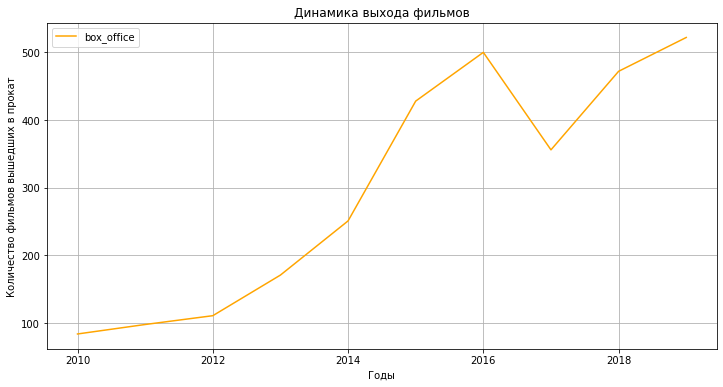

In [40]:
display(data.pivot_table(index='year',values='box_office',aggfunc='count'))# построим сводную таблицу
ratio = data['box_office'][data['box_office'] > 0].count() / len(data)# посчитаем долю фильмов с указанной. информацие о сборах
print(f'Доля фильмов с указанной информацией о дате выхода составляет: {ratio:.2%}')
#построим линейный график
(
data
    .query('box_office > 0')
    .pivot_table(index='year',values='box_office',aggfunc='count')
    .plot(title='Динамика выхода фильмов',xlabel='Годы',ylabel='Количество фильмов вышедших в прокат',color='orange',figsize=(12,6),grid=True)
)    

Количество фильмов выходящих в прокат отображено в сводной таблице по годам. Доля фильмов с указанной информацией о бюджете составляет: `44.20%`

На рафике изображено, как менялась доля фильмов в которых есть информация о сборах. Мы видим, что количество фильмов росло до `2016` года, далее последовал небольшой спад, а в `2019` году кол-во вернулось на уровень `2016` года

Наиболее большой период представленный в данных это отрезок с `2015` г. по `2019` г.

Построим график динамики сборов по годам

Text(0, 0.5, 'Сборы')

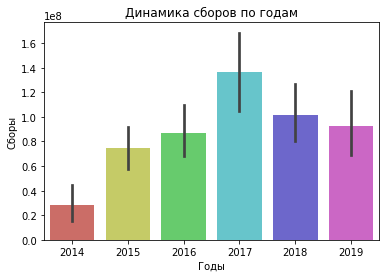

In [41]:
# построим barplot для того, чтобы понять динамику изменений сборов по годам
sns.barplot(x="year", 
            y="box_office",
            palette='hls', 
            order= [2014,2015,2016,2017,2018,2019],
            data=data)
plt.title('Динамика сборов по годам')
plt.xlabel('Годы')
plt.ylabel('Сборы')

График показывает рост с `2014` года по `2017` год, далее следует спад до уровня `2016` года.

In [18]:
# найдем минимальную и максимальную сумму сборов по годам с помощью сводной таблицы
display(data
        .query('box_office > 0')
        .pivot_table(index='year',values='box_office',aggfunc=['min','max']))

,min,max
,box_office,box_office
year,,
2010,75.00,1446400.00
2011,125.00,11618085.00
2012,80.00,2311220.00
2013,40.00,19957031.50
2014,50.00,1016410635.30
2015,100.00,1646580645.70
2016,200.00,2048126108.00
2017,7900.00,2779686144.00


В построенной сводной таблицах мы видим, как менялась минимальная и максимальная сумма сборов по годам

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

,mean,median
,box_office,box_office
year,,
2010,28265.95,2085.00
2011,142289.69,3042.50
2012,58244.24,6900.00
2013,174084.98,3880.00
2014,29372902.68,28150.00
2015,74964135.18,4398303.75
2016,87462889.38,3650260.90
2017,136408860.30,10177833.50


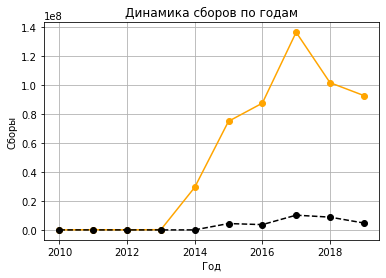

In [42]:
pivot_mean_median = (data
            .query('box_office > 0')
            .pivot_table(index='year',values='box_office',aggfunc=['mean','median']))
display(pivot_mean_median)
plt.plot(pivot_mean_median['mean'],color='orange',linestyle='-',marker='o',label='Средняя')
plt.plot(pivot_mean_median['median'],color='black',linestyle='--',marker='o',label='Медиана')
plt.title('Динамика сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.grid()

Видим, как средняя отличается от медианы. Это говорит о том, что часть фильмов в перид с `2013` по `2019` собрала гораздо больше сборов, чем остальная масса 

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Меняется ли картина в зависимости от года? 

<AxesSubplot:title={'center':'Динамика сборов для возрастных групп'}, xlabel='Годы', ylabel='Сборы'>

([<matplotlib.axis.XTick at 0x7f1ca23e3820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

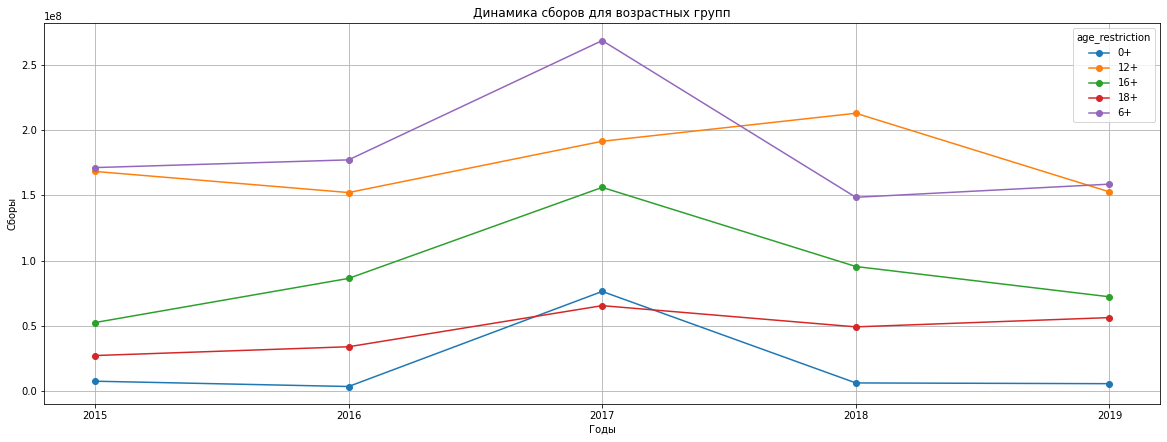

In [35]:
display(data
       .query('box_office > 0 and year >=2015')
       .pivot_table(index='year',columns='age_restriction',values='box_office',aggfunc='mean')
       .plot(title='Динамика сборов для возрастных групп',xlabel='Годы',ylabel='Сборы',marker='o',figsize=(20,7),grid=True))
plt.xticks(range(2015, 2020, 1))

На графике видим как менялась динамика сборов по годам для возрастных групп. Больше всего сборов у групп: `6+` и `12+`, 
У групп `0+` и `18+` минимальные сборы, возможно это связано с тем, что группа `0+` - это мультики и взрослое насаление не смотрит их, а в категорию `18+` входят ужасы и фильмы с ненормативной лексикой.
Так же видим всплеск динамики сборов на уровне `2017 года` у всех групп, такой же всплекс мы видели на прошлых графиках. Это говорит о большом кол-ве фильмов вышедших в прокат или о большом кол-ве сборов в этот период.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку
Посмотрим окупаемость фильмов

In [43]:
data['payback'] = data['budget'] / data['box_office']#добавим столбец окупаемость в data
gos_data = data.query('(refundable_support > 0) or (nonrefundable_support > 0)')
gos_data = gos_data.reset_index()

print('Кол-во фильмов с государственной поддержкой:',len(gos_data))
raiting_gos_film = gos_data['ratings'].mean()
raiting_film = data['ratings'].mean()
print(f'Средний рейтинг фильмов с государственной поддрежкой: {raiting_gos_film:.2}')
print(f'Средний рейтинг фильмов без государственной поддрежкой: {raiting_film:.2}')

gos_data = gos_data.replace(np.inf, np.nan)
data = data.replace(np.inf, np.nan)

ratio_gos_to_film = len(gos_data)/len(data)
print(f'Доля фильмов с гос.поддержкой: {ratio_gos_to_film:.2%}')

payback_gos_film = gos_data['payback'].median()
payback_film = data['payback'].median()
print(f'Средняя окупаемость фильмов с государственной поддрежкой: {payback_gos_film:.2%}')
print(f'Средняя окупаемость фильмов без государственной поддрежкой: {payback_film:.2%}')
gos_data['Сумма поддержки'] = gos_data['refundable_support'] + gos_data['nonrefundable_support']

Кол-во фильмов с государственной поддержкой: 329
Средний рейтинг фильмов с государственной поддрежкой: 6.0
Средний рейтинг фильмов без государственной поддрежкой: 6.5
Доля фильмов с гос.поддержкой: 4.86%
Средняя окупаемость фильмов с государственной поддрежкой: 530.15%
Средняя окупаемость фильмов без государственной поддрежкой: 530.15%


Средняя окупаемость фильмов с государственной поддрежкой и без нее одинаковы, потому что если мы посмотрим, бюджет известен только для фильмов с государственной поддержкой, а для всех остальных нет.

Посмтроим графики для определения динамики выделенных средств государством в период с `2013` по `2019` год

<AxesSubplot:title={'center':'Динамика средств выделенных государством'}, xlabel='Годы', ylabel='Выделенные средства'>

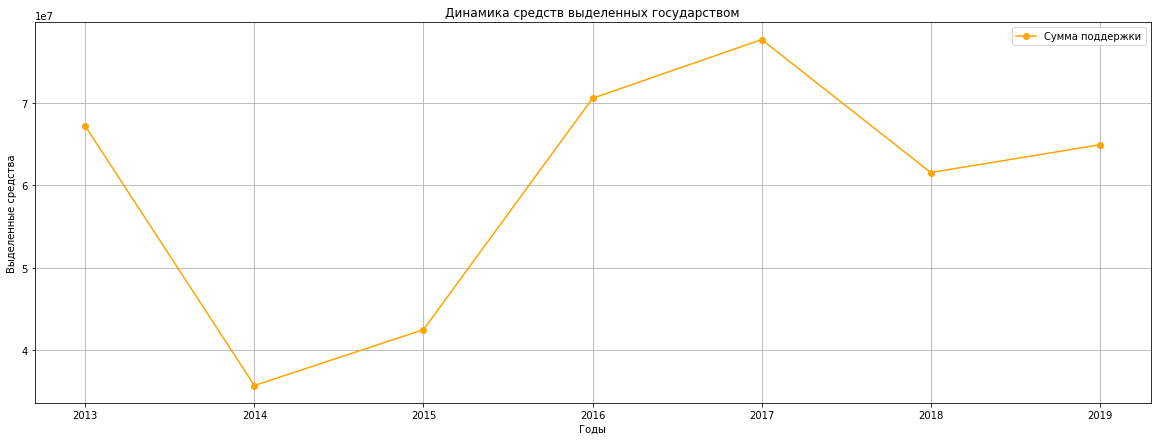

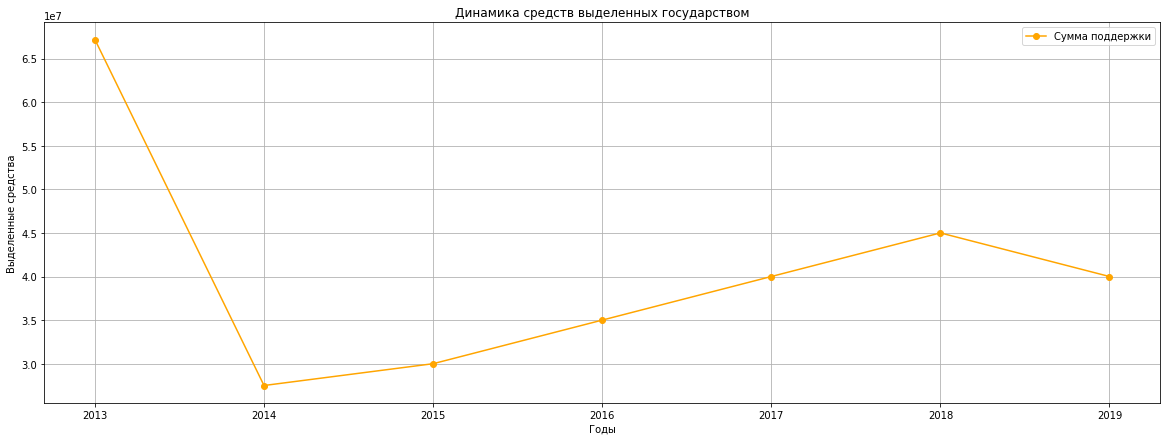

In [83]:
# построим график для средних значений
(
gos_data
    .pivot_table(index='year',values='Сумма поддержки',aggfunc='mean')
    .plot(title='Динамика средств выделенных государством',
          xlabel='Годы',
          ylabel='Выделенные средства',
          marker='o',
          color='orange',
          figsize=(20,7),
          grid=True)
)
# построим график для медианных значений
(
gos_data
    .pivot_table(index='year',values='Сумма поддержки',aggfunc='median')
    .plot(title='Динамика средств выделенных государством',
          xlabel='Годы',
          ylabel='Выделенные средства',
          marker='o',
          color='orange',
          figsize=(20,7),
          grid=True)
)

На графике изображена динамика выделенных средств государством на поддержку кино, из года в год среднеяя сумма выделенных средств растетб за исключением резкого падения в `2014` году



Исследуем `источники государственный поддержки`, постоив графики

<AxesSubplot:title={'center':'Динамика выделенных средств по годам'}, xlabel='Годы', ylabel='Средняя сумма выделенных средств'>

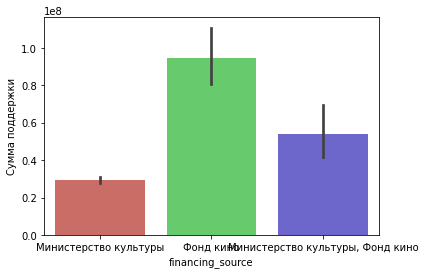

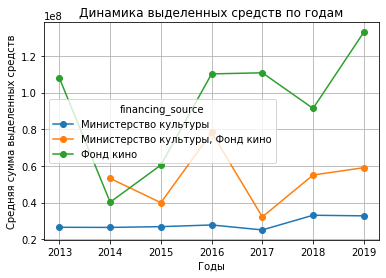

In [45]:
# построим barplot чтобы узнать, кто финансирует кино больше всех
sns.barplot(x="financing_source", 
            y="Сумма поддержки",
            palette='hls', 
            data=gos_data)
# построим линейный график чтобы понять динамику изменения выделенных средств
pivot_fond = (
    gos_data
    .pivot_table(index='year',columns='financing_source',values='Сумма поддержки',aggfunc='mean')
    .plot(marker='o',grid=True,title='Динамика выделенных средств по годам',xlabel='Годы',ylabel='Средняя сумма выделенных средств')
)
pivot_fond

На данном графике видно, что фонд кино выделяет больше средств, чем мин.культуры

Зависит ли рейтинг фильма, от того кто выделяет средства на бюджетирование фильма?

In [46]:
display(gos_data.pivot_table(index='financing_source',values='ratings',aggfunc='mean'))
print('Средний рейтинг фильмов финансируемых Министерством культуры: 6.12')
print('Средний рейтинг фильмов финансируемых Фондом кино и Министерством культуры: 6.44')
print('Средний рейтинг фильмов финансируемых Фондом кино: 5.80')

,ratings
financing_source,
Министерство культуры,6.12
"Министерство культуры, Фонд кино",6.44
Фонд кино,5.80


Средний рейтинг фильмов финансируемых Министерством культуры: 6.12
Средний рейтинг фильмов финансируемых Фондом кино и Министерством культуры: 6.44
Средний рейтинг фильмов финансируемых Фондом кино: 5.80


Можно заметить, что те фильмы, на которые выделяются совместные средства Министерства культуры и Фонда кино набирают больший рейтинг

,mean,median
,box_office,box_office
year,,
2013,10161192.55,10161192.55
2014,63588885.41,5504517.85
2015,68062181.39,9200824.50
2016,101361797.32,17921115.61
2017,278591674.38,50451949.00
2018,177394089.47,27023390.31
2019,144899790.56,30287238.83


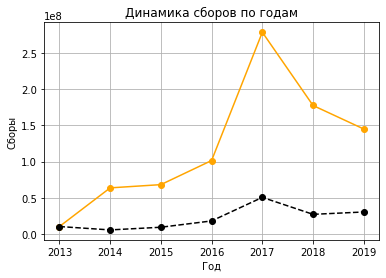

In [47]:
pivot_mean_median = (gos_data
            .pivot_table(index='year',values='box_office',aggfunc=['mean','median']))
display(pivot_mean_median)
plt.plot(pivot_mean_median['mean'],color='orange',linestyle='-',marker='o',label='Средняя')
plt.plot(pivot_mean_median['median'],color='black',linestyle='--',marker='o',label='Медиана')
plt.title('Динамика сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.grid()

С помощью сводной таблице сделали график для средней и медианной суммы сборов для каждого года на основе таблицы фильмов с гос.поддержкой
Видим, как средняя отличается от медианы. Это говорит о том, что часть фильмов в перид с `2014` по `2019` собрала гораздо больше сборов,чем остальная масса 

Посмотрим, как менялась динамика выходов фильмов в прокат с гос. поддержкой и без

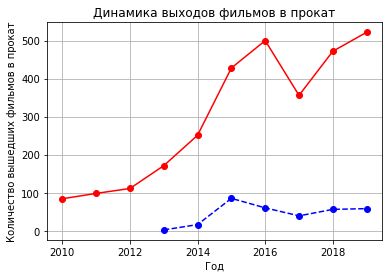

In [48]:
for_grafic_data = (
    data
    .query('box_office > 0')
    .pivot_table(index='year',values='box_office',aggfunc='count')
)   
for_grafic_gos_data = (
    gos_data
    .query('box_office > 0')
    .pivot_table(index='year',values='box_office',aggfunc='count')
)    
plt.plot(for_grafic_data['box_office'],color='red',linestyle='-',marker='o')
plt.plot(for_grafic_gos_data['box_office'],color='blue',linestyle='--',marker='o')
plt.title('Динамика выходов фильмов в прокат')
plt.xlabel('Год')
plt.ylabel('Количество вышедших фильмов в прокат')
plt.grid()

Кол-во фильмов с государственной поддержкой значительно меньше, а в период `с 2010 по 2014 фильмы не финансироварились или мы не владеем данными за этот период`

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

> в период с 2010 по 2014 фильмы не финансировались
    
или мы не владеем данными за этот период.

Получился интересный анализ фильмов с государственной поддержкой.
    
При желании можно дополнить исследование такими пунктами:
    
- изучить на какие жанры выделялось больше средств;
    
- посмотреть фильмы для какой возрастной категории охотнее спонсируются государством;
    
- посмотреть зависит ли рейтинг фильмов от бюджета;
    
- посмотреть каким режиссерам охотнее выделяют средства из государственного бюджета;
    
- и т.д.
    
</div>

На какие жанры больше всего выделялось бюджетных средств?

Text(0, 0.5, 'Размер выделенного бюджета на жанр')

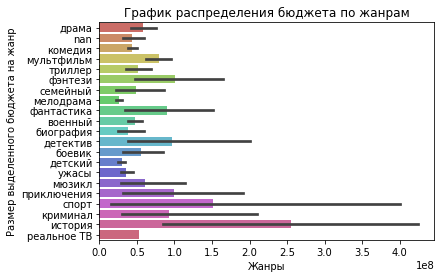

In [49]:
sns.barplot(x="Сумма поддержки", 
            y="general_genre",
            palette='hls', 
            data=gos_data)
plt.rcParams['figure.figsize']=30,10
plt.title('График распределения бюджета по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Размер выделенного бюджета на жанр')

На данном графике видно, что больше всего средств выделяется на жанр `история`


Исследуем возрастную категорию, на которую больше всего выделялось бюджетных средств

Text(0, 0.5, 'Размер выделенного бюджета')

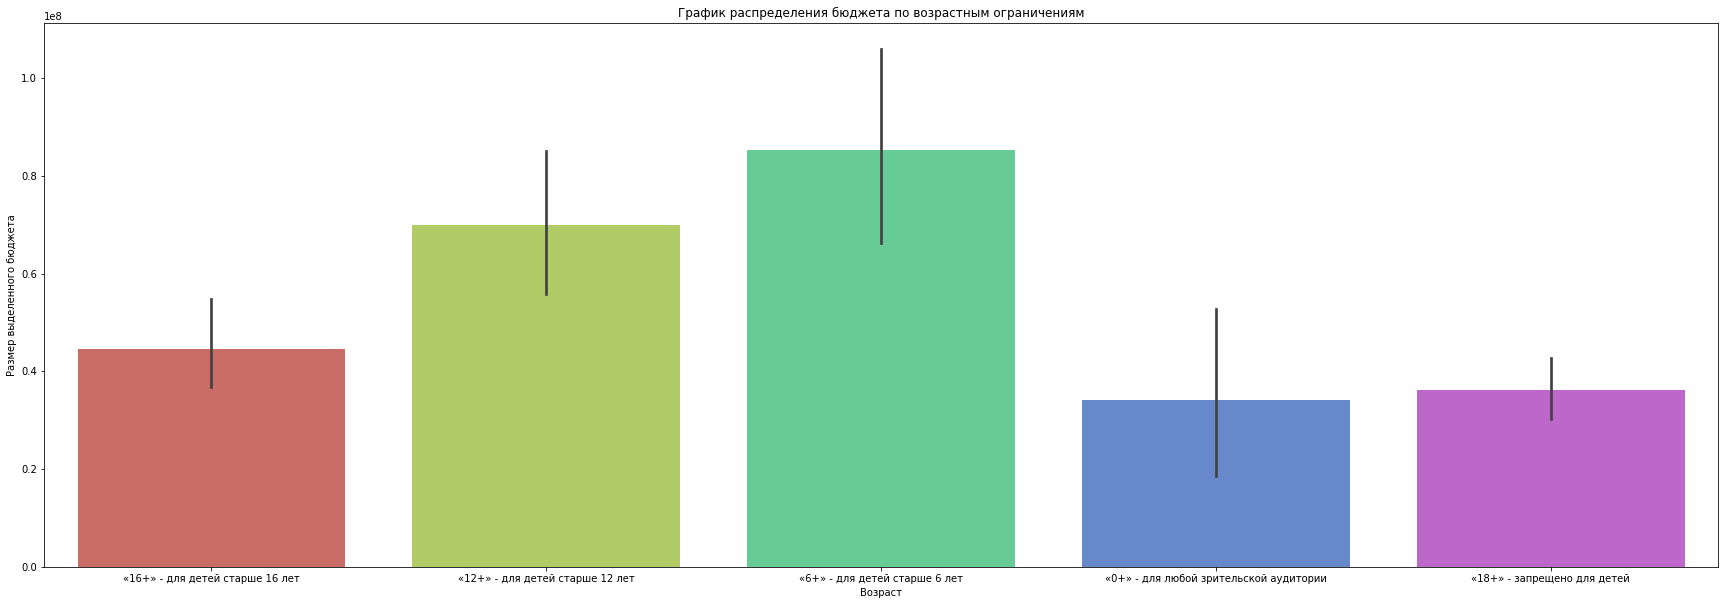

In [50]:
sns.barplot(x="age_restriction", 
            y="Сумма поддержки",
            palette='hls', 
            data=gos_data)
plt.rcParams['figure.figsize']=5,5
plt.title('График распределения бюджета по возрастным ограничениям')
plt.xlabel('Возраст')plt.ylabel('Размер выделенного бюджета')

Больше всего средств государственных средств выделяется на возрастную категорию `6+`


Зависит ли рейтинг от суммы выделенных средств государтсвенной поддержки?

<AxesSubplot:title={'center':'Рейтинг по бюджету'}, xlabel='Рейтиг', ylabel='Выделенные средства'>

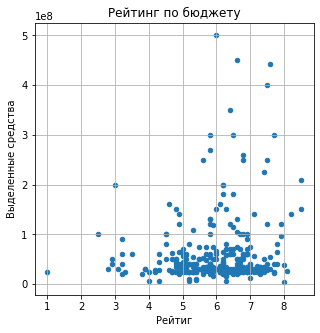

In [51]:
gos_data.plot(
    title='Рейтинг по бюджету',
    x = 'ratings',
    y = 'Сумма поддержки',
    xlabel='Рейтиг',
    ylabel='Выделенные средства',
    grid = True,
    kind = 'scatter')

В целом, если смотреть на диапозон рейтинга с 4 до 10, можно сказать что с увеличением бюджета рейтинг фильма растетю Можно заметить, что большинство фильмов имеющих примерно одинаковую сумму государственной поддержки имеет разные рейтинги. Но фильмы на которые выделялось больше всего средств имеют рейтинги от 6 до 7.8.

### Шаг 5. Напишите общий вывод

Доля фильмов финансируемых государством составляет 4.86%, средний рейтинг фильмов с гос. поддержкой меньше, чем у остальных фильмов и составлет 5.8 по данным Кинопоиска. Динамика сборов у фильмов с гос.поддержкой практически индентична динамики сборов фильмов без гос.поддержки и говорит о растущем тренде интереса к кинопрокату в целом.
